In [ ]:
import os
import glob
import numpy as np
import tensorflow as tf
import googleapiclient.discovery
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Keys')
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "ml4va-311616-0c66eec8a451.json"

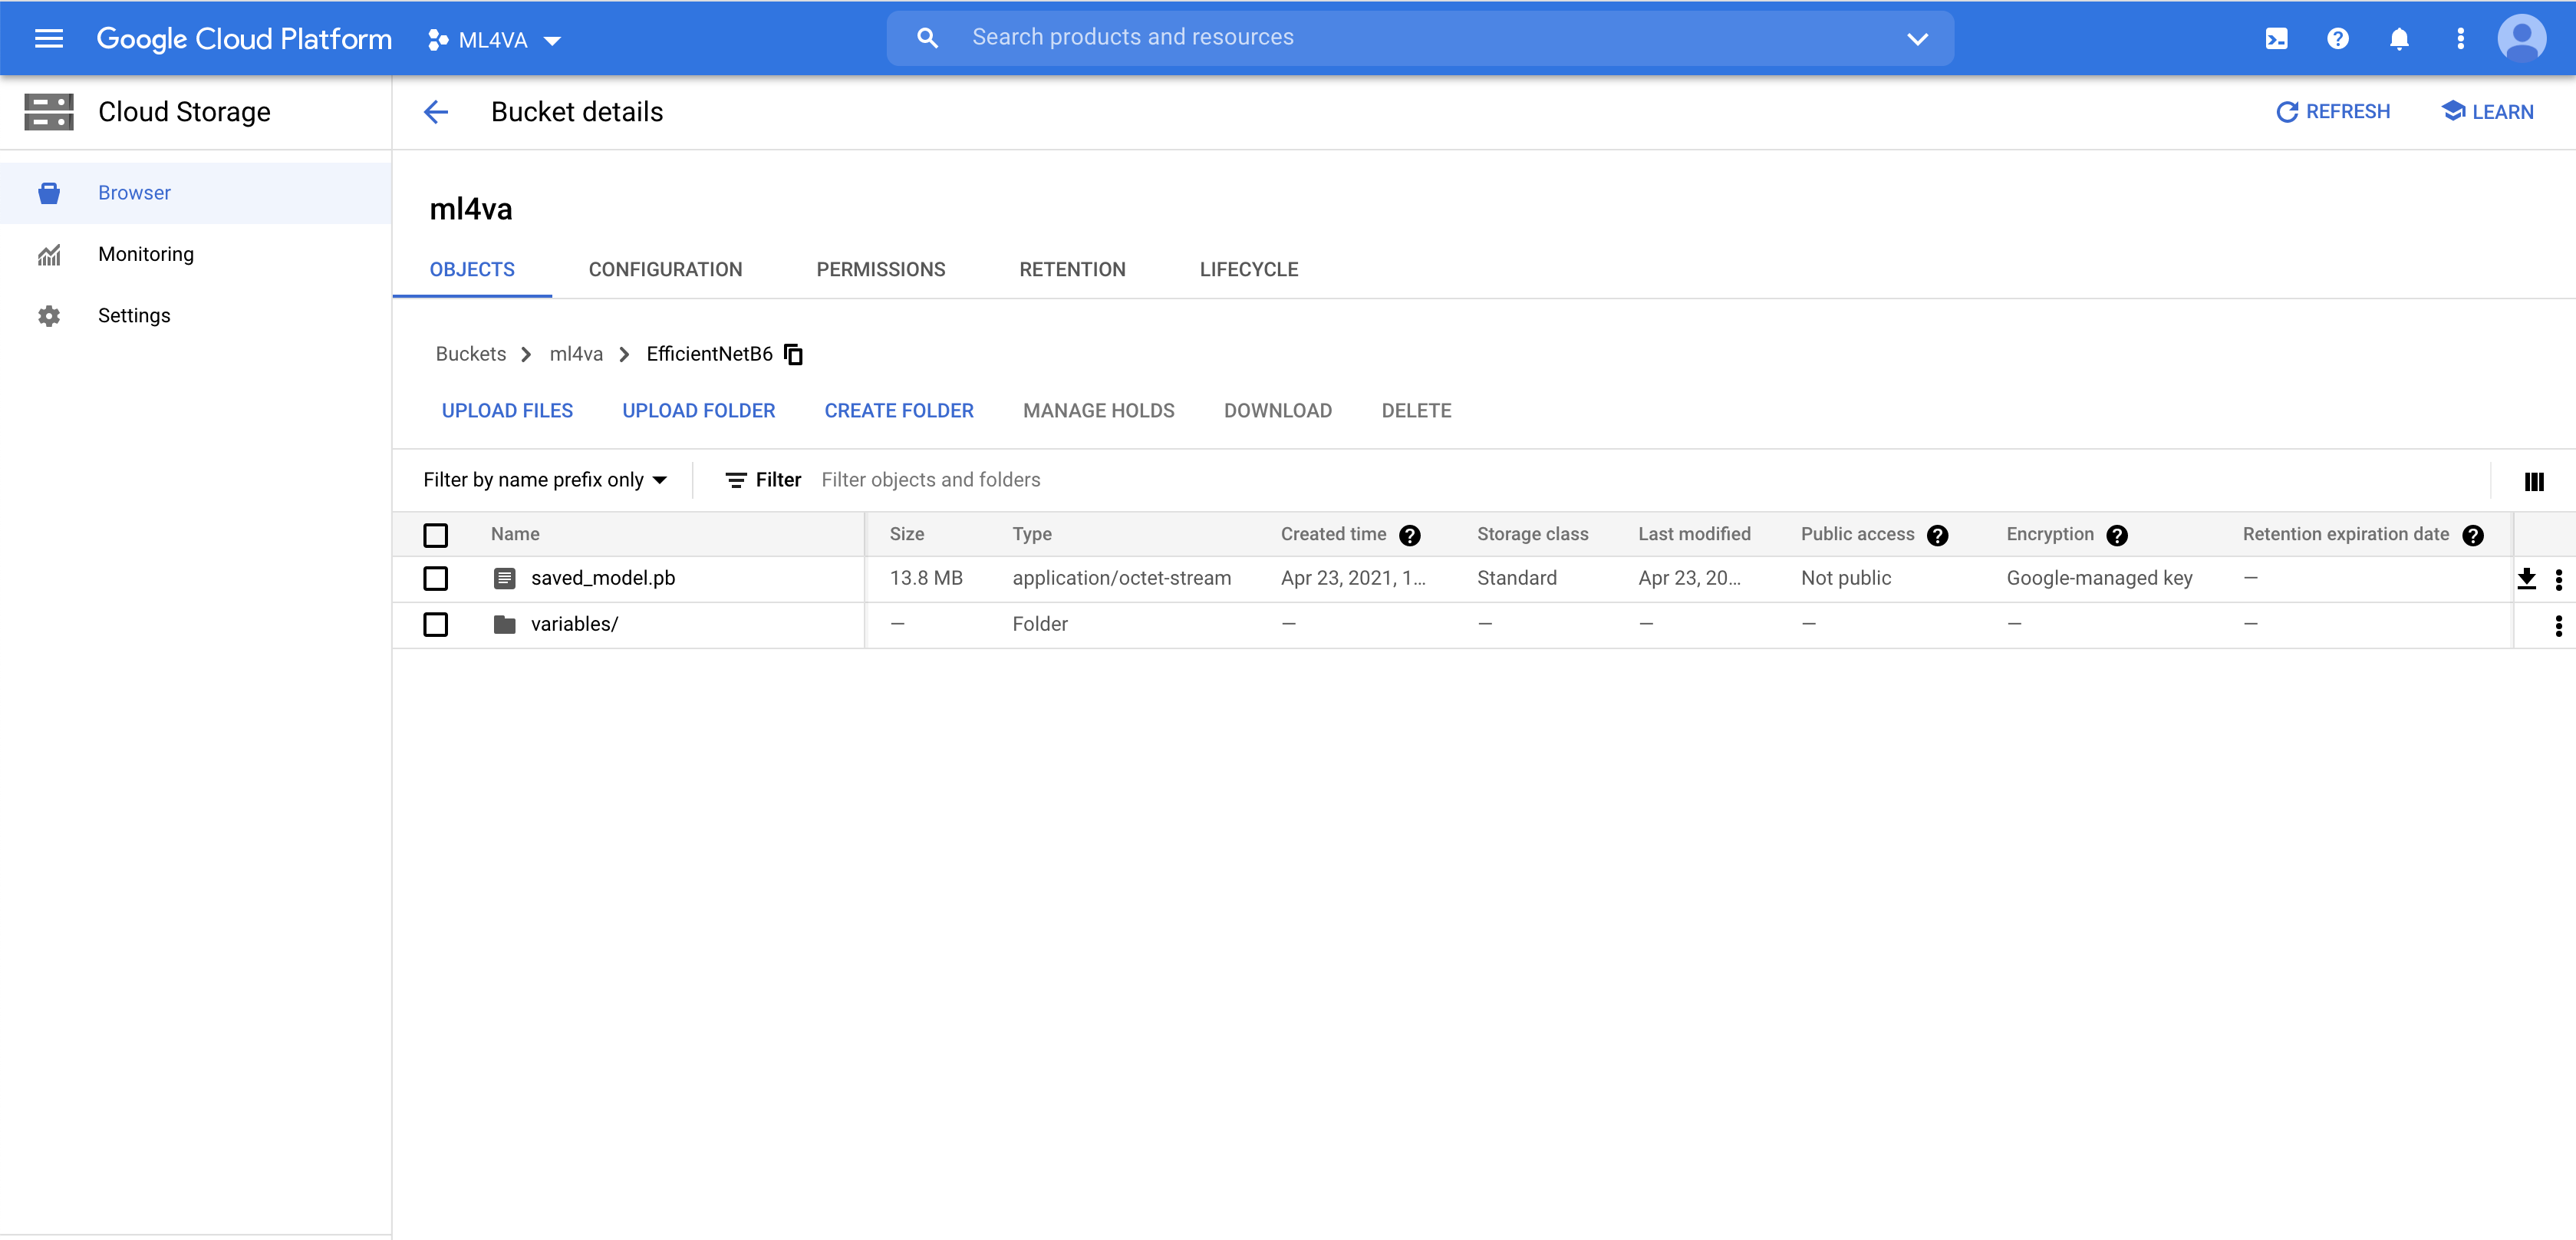

In [ ]:
project_id = "ml4va-311616" # change this to your project ID
model_id = "EfficientNetB6"
model_path = "projects/{}/models/{}".format(project_id, model_id)
model_path += "/versions/v0002/"
ml_resource = googleapiclient.discovery.build("ml", "v1").projects()

In [ ]:
def predict(X):
  input_data_json = {"signature_name": "serving_default",
                       "instances": X.tolist()}
  request = ml_resource.predict(name=model_path, body=input_data_json)
  response = request.execute()
  if "error" in response:
      raise RuntimeError(response["error"])
  return [pred for pred in response["predictions"]]

In [ ]:
# Function converts an image to height and width used for the model and then to an array
def imageToArray(ImagePath):
  image = tf.keras.preprocessing.image.load_img(ImagePath, target_size = (224, 224))
  input_arr = tf.keras.preprocessing.image.img_to_array(image)
  return input_arr

In [ ]:
# Function takes in the softmax values and returns the plant type
def getPlantType(Y_probas):
  keys = {0 : 'Arrowhead', 1 : 'Duckweed', 2 : 'Grassy Mud Plaintain', 3 : 'Hydrilla', 4 : 'Watercress'}
  plantType = [keys.get(np.argmax(np.asarray(image.get('dense_2')))) for image in Y_probas]
  return plantType

In [ ]:
# Function takes in a list of image path and converts image to array, predict, and return result
def getResult(ImagePaths):
  result = [getPlantType(predict(imageToArray(image))) for image in ImagePaths]
  return result

In [ ]:
getResult(['/content/drive/MyDrive/VA Plants/Test/Hydrilla/hydrilla12.png', 
          '/content/drive/MyDrive/VA Plants/Test/Duckweed/dmg_93.png',
          '/content/drive/MyDrive/VA Plants/Test/Watercress/img_96.png'])

[['Hydrilla'], ['Duckweed'], ['Watercress']]